## Data Exploratory, Customers Overview, User Engagement, Experience and Satisfaction Analysis of Telecom Users Data

## Task 1

### Data Cleaning, Transformations and Feature Extractions.

#### User Overview analysis


## Steps Involved

### Step 1: Importing necessary and initial Packages and Loading Data

In [12]:
# Importing necessary packages for data loading and initial visualizations
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from scipy.stats import skew, norm
from sklearn.preprocessing import StandardScaler, PowerTransformer


In [13]:
# Loading data 
pd.set_option('max_column', None)
loaded_data = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=['?', None])
loaded_data.sample(3) # Print the head sample of the Data #

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
136615,7.277826e+18,4/29/2019 1:10,874.0,4/30/2019 1:10,832.0,86399.0,2.082014e+14,3.366038e+10,8.637690e+13,T78284C,102.0,50.0,51674.0,11377.0,6471344.0,100307.0,87.0,2.0,6.0,2.0,98.0,1.0,0.0,0.0,55618809.0,3476597.0,11653097.0,11029948.0,86399958.0,Huawei,Huawei B528S-23A,738.0,266.0,1965.0,4.0,829.0,18.0,25517.0,25756.0,3037774.0,17519.0,5075283.0,1465586.0,2092004.0,919988.0,1847563.0,12853242.0,17441994.0,8101935.0,203445369.0,14712348.0,758502573.0,15670881.0,53741499.0,232939987.0
38140,7.277826e+18,4/25/2019 2:43,998.0,4/26/2019 1:44,270.0,82894.0,2.082017e+14,3.378156e+10,8.694800e+13,D50813C,30.0,25.0,41774.0,1175.0,26081.0,NaN,97.0,2.0,0.0,0.0,99.0,0.0,0.0,0.0,10026732.0,2310529.0,785120.0,800201.0,82894272.0,Huawei,Huawei P20,6.0,25.0,17.0,NaN,96.0,3.0,4282.0,4348.0,2644589.0,23873.0,7436551.0,3188888.0,549005.0,736308.0,10828470.0,5514626.0,14338424.0,617261.0,317990824.0,2041305.0,833999581.0,9271256.0,21393517.0,353787863.0
51516,1.311448e+19,4/24/2019 14:50,385.0,4/27/2019 11:29,848.0,247141.0,2.082019e+14,3.365055e+10,3.527201e+13,D53406A,24.0,5.0,34.0,53.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,46019.0,49761.0,247141463.0,Samsung,Samsung Galaxy S6 Plus (Sm-G928),NaN,NaN,NaN,NaN,NaN,NaN,214.0,233.0,2331895.0,7598.0,4506248.0,2175412.0,3057376.0,24366.0,6899020.0,3754247.0,12577913.0,2137550.0,683976392.0,15804167.0,209606355.0,3991663.0,27895003.0,713348844.0


### Step 2: Showing the Data Columns and Metrics

#### Size of the Data, and other related metrics, like Data types of each column

In [14]:
# number of data points
print(f" There are {loaded_data.shape[0]} rows and {loaded_data.shape[1]} columns of Telecom Users Data")
print("Shape of the Data",loaded_data.shape)
print("------------ Data Type of each Column----------------")
print("")
loaded_data.info()

 There are 150001 rows and 55 columns of Telecom Users Data
Shape of the Data (150001, 55)
------------ Data Type of each Column----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI              

### Step 3: Handling Missing Values

#### Showing the number and percentage of missing Values

In [15]:
# Percentage % of total missing values in the dataset

def total_percent_missing_data(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom dataset contains a Total of ", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

total_percent_missing_data(loaded_data)

The Telecom dataset contains a Total of  12.5 % missing values.


In [16]:
# Column(s) that has missing values and their Percentages

total_no_data_per_column = loaded_data.shape[0]-1 # Total number of rows in every column
print(" ")

# printing the number of Missing data per column
item_list = []
row_list = []
i=0
for item in loaded_data.columns:
    no_missing_values = loaded_data[item].isna().sum()
    percentage = str(round(((no_missing_values/total_no_data_per_column) * 100), 2))+" %"
    row_list.append(item)
    row_list.append(no_missing_values)
    row_list.append(percentage)
    item_list.append(row_list)
    row_list = []
    

# Table showing statics of missing Values
df = pd.DataFrame(item_list,
                  columns=['Column', 'No. of Missing Values', '% Missing Values per column'])
df.style


,Column,No. of Missing Values,% Missing Values per column
0,Bearer Id,991,0.66 %
1,Start,1,0.0 %
2,Start ms,1,0.0 %
3,End,1,0.0 %
4,End ms,1,0.0 %
5,Dur. (ms),1,0.0 %
6,IMSI,570,0.38 %
7,MSISDN/Number,1066,0.71 %
8,IMEI,572,0.38 %
9,Last Location Name,1153,0.77 %


#### Grouping Columns having missing values less than 10%, 10% - 20%, 20% - 40%,  40% - 50%, and more than 70% of the total data of the column



In [17]:
# List to Hold these columns  #### Refactor the Print function
non_missing_list, less_1, less_10, less_20, less_40, less_50, less_70, greater_70 = [],[],[],[],[],[],[],[]
for item in loaded_data.columns:
    no_missing_values = loaded_data[item].isna().sum()
    percentage = round(((no_missing_values/total_no_data_per_column) * 100), 2)
    
    if percentage == 0:
        non_missing_list.append(item)
    if percentage >0 and percentage <= 1:
        less_1.append(item)
    if percentage > 1 and percentage <= 10:
        less_10.append(item)
    if percentage > 10 and percentage <= 20:
        less_20.append(item)
    if percentage > 20 and percentage <= 40:
        less_40.append(item)
    if percentage > 40 and percentage <= 50:
        less_50.append(item)
    if percentage > 50 and percentage <= 70:
        less_70.append(item)
    if percentage > 70:
        greater_70.append(item)

def display(element_list, percentage):
    i = 0
    for element in element_list:
        perc = percentage[i]
        i +=1
        print("Number of columns with %s missing Values : " %perc,len(element))
        print(element)
        print()

element_to_dispaly = [non_missing_list, less_1, less_10, less_20, less_40, less_50, less_70, greater_70]
percentage = ["0","less than 1%","less than 10%","less than 20%","less than 40%","less than 50%","less than 70%","greater than 70%"]

display(element_to_dispaly, percentage)

# ploting the Missing Data by Groups
print("Ploting the Missing Data by Groups")

series = pd.Series([len(non_missing_list), len(less_1),len(less_10),len(less_20), 
                    len(less_40), len(less_50), len(less_70), 
                    len(greater_70)], 
                   index=["No missing Value","<=1%", "<=10%", "<=20%", "<=40%","<=50%","<=70%",">=70%"], name="% of columns with NaN Values")

# series.plot.pie(figsize=(6, 6));

Number of columns with 0 missing Values :  26
['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

Number of columns with less than 1% missing Values :  17
['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B', 'Nb

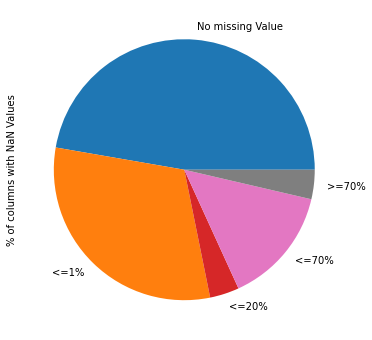

In [18]:
series.plot.pie(figsize=(6, 6));

### Droping columns with more than 25-30% missing Values

From Above analytics, these Columns are: 
- 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B'


In [19]:
# Column dropiing function
def drop_column(list_to_be_droped):
    processed_data = loaded_data.drop(list_to_be_droped, 
                      axis=1)
    return processed_data


# Prepare a list of columns to be droped and pass to the Function
list_droped = ['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL',
               'Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B',
               'Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 37500B < Vol UL',
               'Nb of sec with 6250B < Vol UL < 37500B']

processed_data = drop_column(list_droped)
print("Size of Data Left: ",processed_data.shape)
processed_data.sample(3)

Size of Data Left:  (150001, 47)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
121668,1.304243e+19,4/28/2019 4:26,744.0,4/29/2019 4:26,654.0,86399.0,2.082022e+14,3.366964e+10,3.515541e+13,L72071C,47.0,18.0,43923.0,2017.0,356659.0,20674.0,92.0,3.0,1.0,2.0,99.0,0.0,0.0,0.0,2424867.0,2069018.0,86399910.0,Samsung,Samsung Galaxy J5 (Sm-J530),8181.0,8352.0,1349561.0,28592.0,3563779.0,2998287.0,2828587.0,609851.0,19978727.0,20564151.0,7990511.0,11051163.0,744945201.0,3185438.0,664544397.0,10199083.0,48636565.0,780656366.0
19524,1.304243e+19,4/24/2019 19:57,46.0,4/25/2019 0:53,384.0,17773.0,2.082009e+14,3.367564e+10,8.646300e+13,D36757C,41.0,9.0,5261.0,581.0,1248.0,NaN,95.0,3.0,1.0,0.0,99.0,0.0,0.0,0.0,225565.0,223470.0,17773338.0,Oneplus Technology (Shenzhen) Co Ltd,Oneplus Technolo. Oneplus 5,578.0,582.0,1065013.0,47859.0,5773807.0,3974974.0,2587021.0,763461.0,6039505.0,21157999.0,17438791.0,20651396.0,82662485.0,10355701.0,673805180.0,7404781.0,64356171.0,115566622.0
12777,1.304243e+19,4/24/2019 18:04,172.0,4/25/2019 1:58,110.0,28433.0,2.082019e+14,3.366026e+10,3.590391e+13,D92926C,48.0,14.0,128798.0,1743.0,1650841.0,14872.0,69.0,7.0,11.0,11.0,99.0,0.0,0.0,0.0,8137782.0,9716264.0,28433938.0,Samsung,Samsung Galaxy S8 (Sm-G950F),9693.0,15610.0,415085.0,48275.0,1132187.0,2516059.0,1214893.0,422810.0,13469860.0,12126629.0,20407084.0,9494194.0,498445863.0,13540380.0,390570738.0,12087899.0,50236246.0,535084972.0


### Filling or Droping Rows of Missing Values

#### Columns to be Considered

In [20]:
# Columns to be Considered
less_1, less_20

(['Bearer Id',
  'IMSI',
  'MSISDN/Number',
  'IMEI',
  'Last Location Name',
  'DL TP < 50 Kbps (%)',
  '50 Kbps < DL TP < 250 Kbps (%)',
  '250 Kbps < DL TP < 1 Mbps (%)',
  'DL TP > 1 Mbps (%)',
  'UL TP < 10 Kbps (%)',
  '10 Kbps < UL TP < 50 Kbps (%)',
  '50 Kbps < UL TP < 300 Kbps (%)',
  'UL TP > 300 Kbps (%)',
  'Handset Manufacturer',
  'Handset Type',
  'Nb of sec with Vol DL < 6250B',
  'Nb of sec with Vol UL < 1250B'],
 ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'])

#### Filling Values in Discrete and Categoric data columns

For Discrete, and Categoric data, I will use Mode Filling method! This will be done because the columns 
are discrete and Categoric, therefore, we'll make assumptions that the missing values are those with 
highest frequency/occurence *******

These columns are ['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer',
  'Handset Type']

In [21]:
# Filling Discrete and Categorical data Columns with Modes

def Mode_filling(data, column_list):
    for column in column_list:
        data[column] = data[column].fillna(data[column].mode()[0])
        
    return data

# Fill 'Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name' columns with mode 
column_list_mode_fill = ['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer',
  'Handset Type']

processed_data = Mode_filling(processed_data, column_list_mode_fill)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

#### Filling Values in Continuous data columns

For Continuous data, I will use k-NN (k nearest neighbours) method to fill missing values! k-NN is chosen to fill missing values, by using close/neighbor related data,and this assumed that, if a number of parameters are almost the same, therefore, these might be doing the same activities on the Internet, for example, streaming videos on youtube or playing games, etc.*******

These columns are:

['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B','Avg RTT DL (ms)', 'Avg RTT UL (ms)']

In [23]:
# Using k-NN Method to fill missing Continuous values for columns shown above

from sklearn.impute import KNNImputer

def knn_fix_missing_value(data, colum_list):
    for column in colum_list:
        imputer = KNNImputer(n_neighbors = 2, weights='uniform', metric='nan_euclidean')
        # data[column] = imputer.fit_transform(data[[column]])
        data[column] = imputer.fit_transform(data[[column]])
        
    
    return data


missing_columns = ['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
                   'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
                   '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B', 
                   'Nb of sec with Vol UL < 1250B','Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                   'TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)']

processed_data = knn_fix_missing_value(processed_data, missing_columns)

processed_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

###  Detection of Outliers or abnormalities in Data

For Task1, the following columns will be selected for explorations; 'Total UL (Bytes)', 'Total DL (Bytes)', 'Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)'.

In [24]:
# Descriptions of the Columns Statistics

processed_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150000.000000,150000.000000,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150000.000000,150000.000000,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500000e+05,1.500000e+05,1.500000e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.015806e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.182414e+10,4.842386e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.829177e+06,1.408880e+06,1.046091e+08,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893178e+18,288.611834,288.097653,8.103762e+04,2.144723e+10,2.438731e+12,2.238859e+13,559.342620,76.529933,23971.878541,4625.355500,1.172356e+08,1.577616e+07,13.005221,6.199592,4.149070,4.816738,4.622035,3.216651,1.620229,1.291972,5.696395e+06,4.643231e+06,8.103761e+07,9148.498009,10133.431600,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365094e+10,3.544691e+13,35.000000,3.000000,43.000000,47.000000,1.332932e+06,6.300900e+04,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487775e+04,2.153975e+04,5.744079e+07,88.000000,107.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366361e+10,3.572151e+13,54.000000,7.000000,63.000000,63.000000,2.080991e+07,7.596587e+05,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.930450e+04,4.679350e+04,8.639998e+07,205.000000,220.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368307e+10,8.611970e+13,109.795706,17.662883

In [25]:
# Plot functions to show outliers and abnomalities

################### PLOTTING FUNCTIONS #####################

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=4, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()
def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


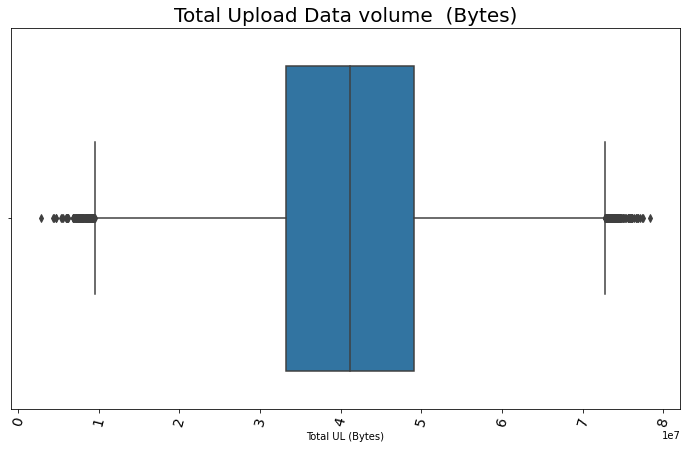

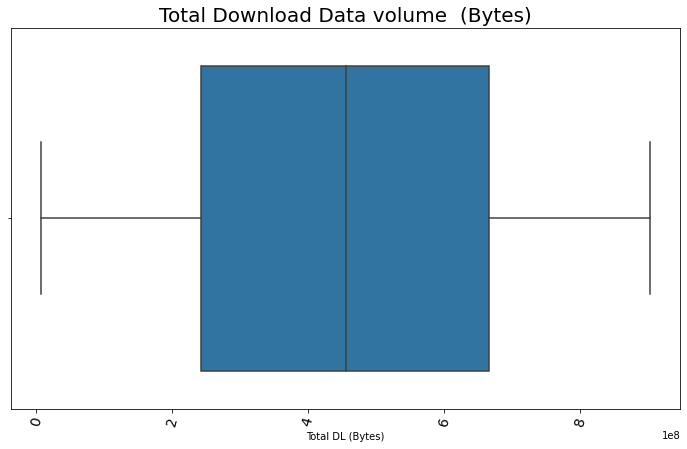

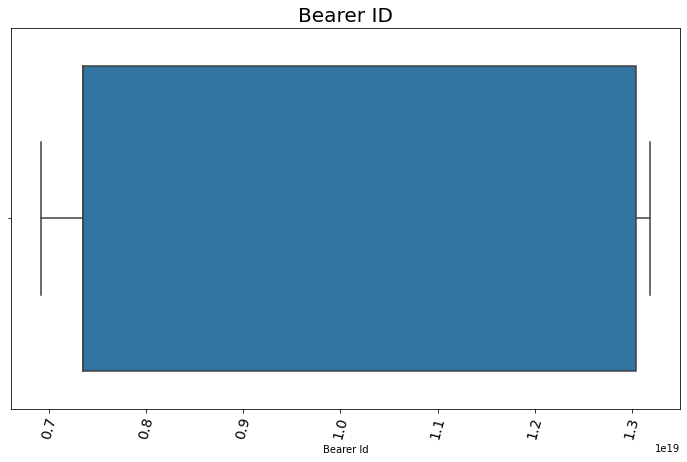

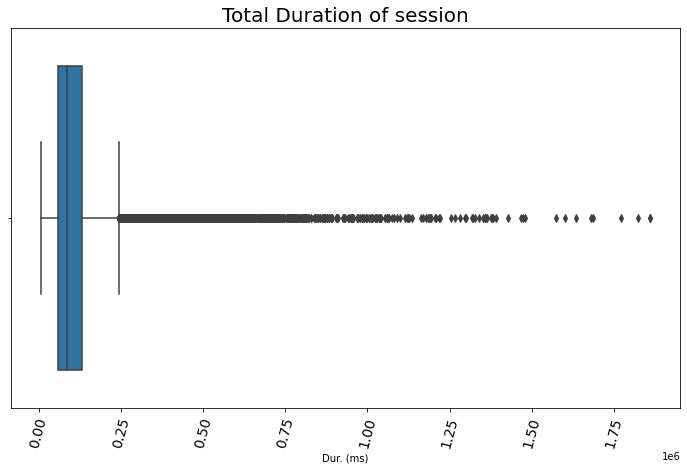

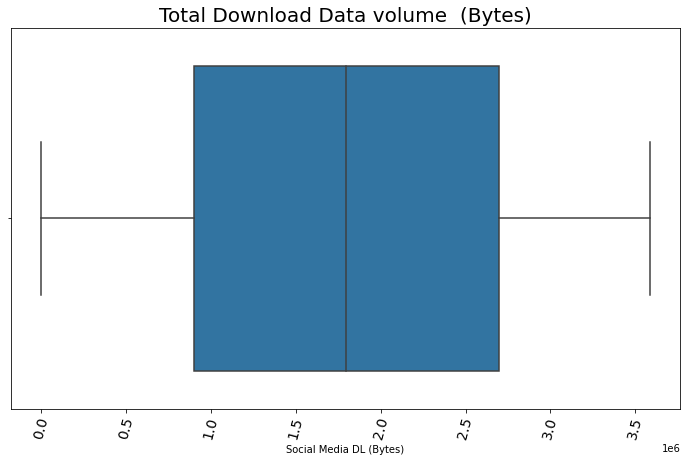

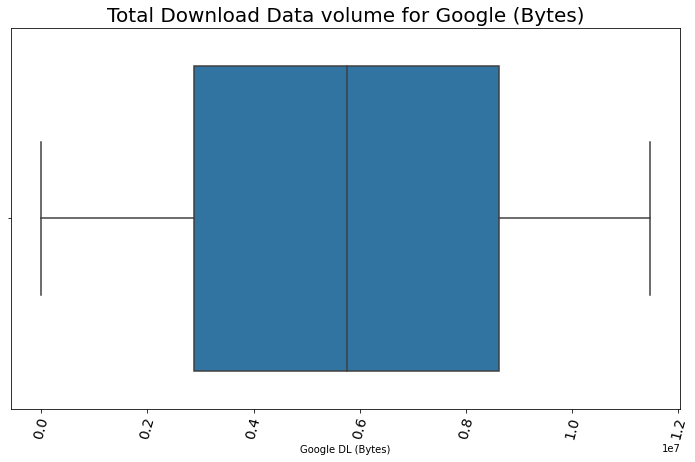

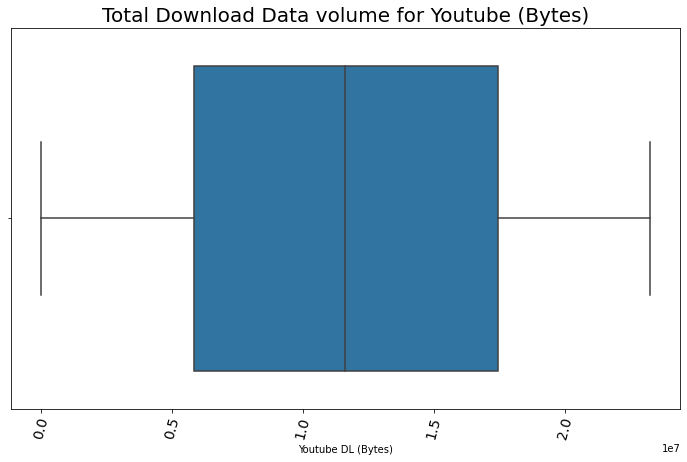

In [26]:
# Showing Outliers of Some columns

plot_box(processed_data, "Total UL (Bytes)", "Total Upload Data volume  (Bytes)")
plot_box(processed_data, "Total DL (By"
                         "tes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Bearer Id", "Bearer ID")
plot_box(processed_data, "Dur. (ms)", "Total Duration of session")

plot_box(processed_data, "Social Media DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Google DL (Bytes)", "Total Download Data volume for Google (Bytes)")
plot_box(processed_data, "Youtube DL (Bytes)", "Total Download Data volume for Youtube (Bytes)")

## Exploratory Data Analysis (EDA)
## 1. User Overview Analysis

### Top 10 Handsets, and Top 3 Handset Manufacturers used by the Customers

In [27]:
# Using  Handset Type and Handset Manufacturer

def high_frequency_category(data, column):
    list_Of_Handset_In_Column=list(data[column].value_counts().index)
    top_category_column = data[column].value_counts()
    
    return list_Of_Handset_In_Column, top_category_column

list_Of_Handset_type, top_Handset_type = high_frequency_category(processed_data, "Handset Type")
list_Of_Handset_manufact, top_Handset_manufact = high_frequency_category(processed_data, "Handset Manufacturer")

print("Sample List_Of_Handset_type")
print(list_Of_Handset_type[:15])
print("")
print("Sample List_Of_Handset_Manufacturer")
print(list_Of_Handset_manufact[:15])
print("")

print("List_Of_Top10_Handset_type")
print(top_Handset_type[:10])
print("")
print("List_Of_Top3_Handset_Manufacturer")
print(top_Handset_manufact[:3])

Sample List_Of_Handset_type
['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)', 'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)', 'Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)', 'Samsung Galaxy J3 (Sm-J330)', 'Samsung Galaxy S7 (Sm-G930X)', 'Apple iPhone 8 Plus (A1897)']

Sample List_Of_Handset_Manufacturer
['Apple', 'Samsung', 'Huawei', 'undefined', 'Sony Mobile Communications Ab', 'Wiko Global Sasu', 'Xiaomi Communications Co Ltd', 'Oneplus Technology (Shenzhen) Co Ltd', 'Asustek', 'Lenovo', 'Tcl Communication Ltd', 'Crosscall', 'Zte', 'Microsoft Mobile Oy', 'Htc']

List_Of_Top10_Handset_type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iP

Text(0.5, 1.0, 'A barplot indicating top ten handset types')

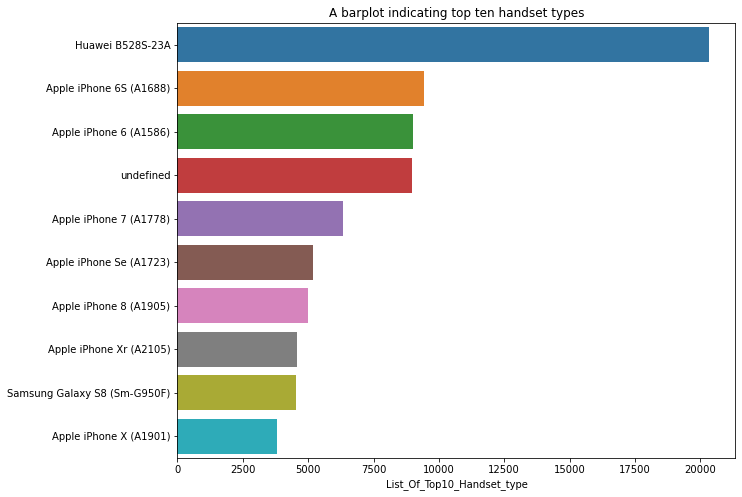

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(y = top_Handset_type[:10].index, x = top_Handset_type[:10])
plt.xlabel('List_Of_Top10_Handset_type')
plt.title('A barplot indicating top ten handset types')


Text(0.5, 1.0, 'A barplot indicating top 3 handset Manufacturer')

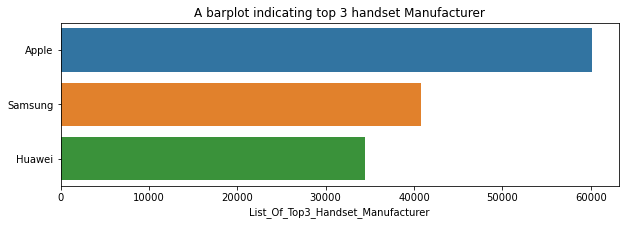

In [29]:
plt.figure(figsize=(10,3))
sns.barplot(y = top_Handset_manufact[:3].index, x = top_Handset_manufact[:3])
plt.xlabel('List_Of_Top3_Handset_Manufacturer')
plt.title('A barplot indicating top 3 handset Manufacturer')

#### Top 5 Handset  per Top 3 Handset Manufacturers
- From diagrams above;

Top 5 Handset Types:
- ['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'Apple iPhone 7 (A1778)','Apple iPhone Se (A1723)'],

Handset per Handset_Manufacturer:
- [Huawei, Apple, Samsung]

### Short interpretation and recommendation to marketing teams

- Apple, Huawei and Samsung are the leading manufacturers. The top 10 handsets also are manufactured by these companies. Therefore, The marketing teams should target marketing more on Apple, Samsung, and Huawei handsets.

#### Removing Outliers for Columns that will be used for Task 1

In [30]:
# Removing Outliers for Columns used in Task 1

def fix_outlier(data, column_list):
    for column in column_list:
        data[column] = np.where(data[column] > data[column].quantile(0.95), data[column].median(),data[column])
    
    return data

In [31]:
list_of_columns = ['Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)', 'Social Media DL (Bytes)', 
                   'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 
                   'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 
                   'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

processed_data = fix_outlier(processed_data, list_of_columns)


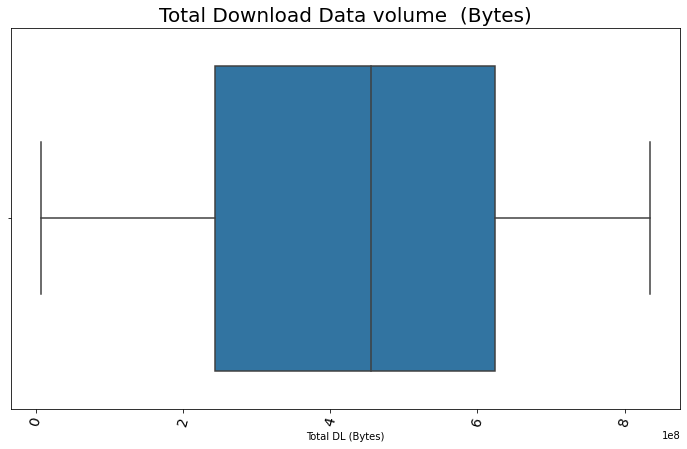

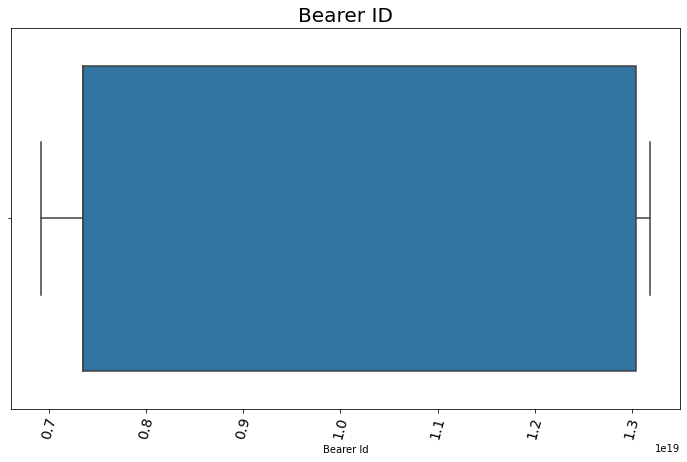

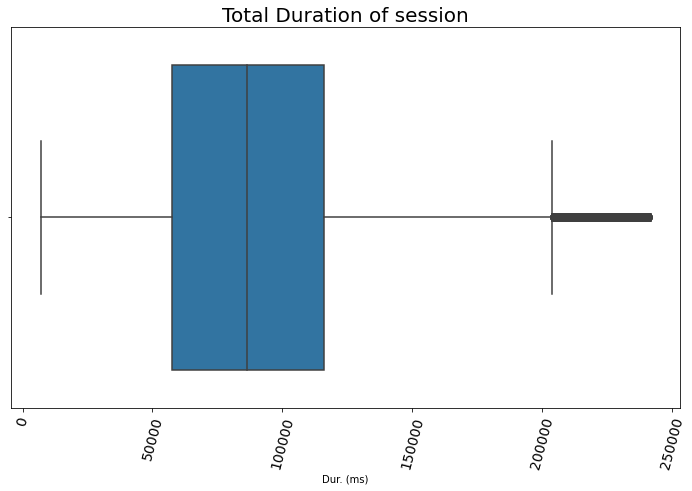

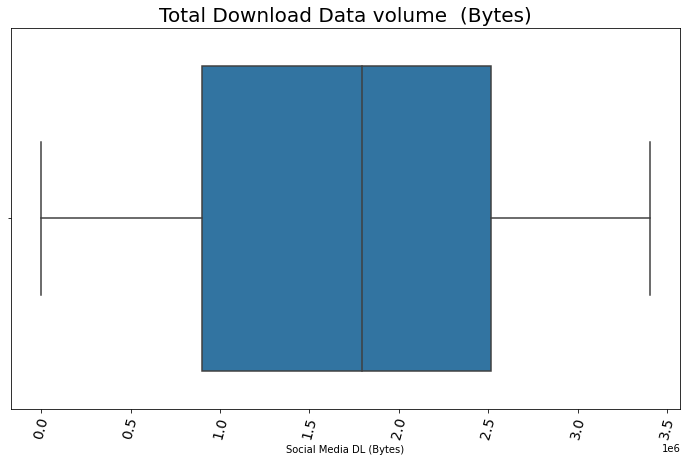

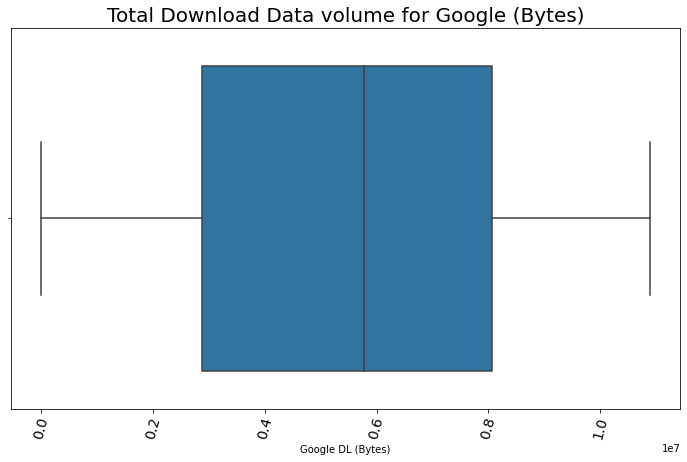

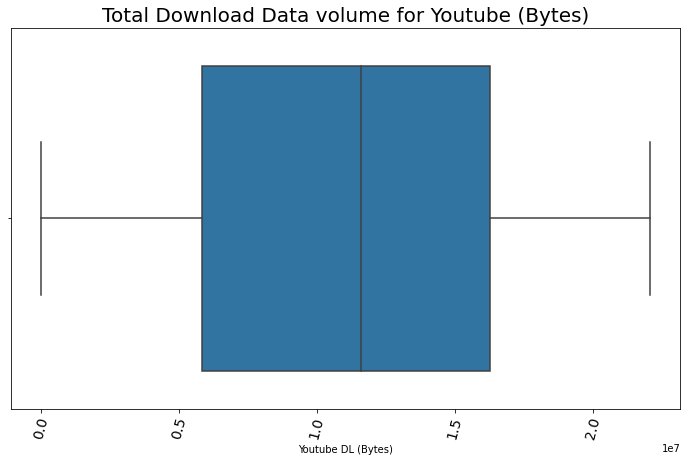

In [32]:
# Showing Outliers if any after Removing them

plot_box(processed_data, "Total DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Bearer Id", "Bearer ID")
plot_box(processed_data, "Dur. (ms)", "Total Duration of session")

plot_box(processed_data, "Social Media DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Google DL (Bytes)", "Total Download Data volume for Google (Bytes)")
plot_box(processed_data, "Youtube DL (Bytes)", "Total Download Data volume for Youtube (Bytes)")

### Task 1.1

### User Behaviours

#### Aggregating columns data per user
#### Non Graphical Univariate Analysis of important features
1. Aggregating per number of xDR sessions, and Duration

In [33]:
# Function to Aggregate user data

def aggregate_func(data, ref_column, agg_column, param_list):
    User_per_xDR_Sessions = data.groupby(ref_column).agg({agg_column: param_list})
                                                                                               
    
    return User_per_xDR_Sessions

# Using MSISDN/Number column to Identify User, and Bearer Id as Session identifiers
list_m = ['count']
User_per_xDR_Sessions = aggregate_func(processed_data,'MSISDN/Number','Bearer Id',list_m)
User_per_Duration = aggregate_func(processed_data,'MSISDN/Number','Dur. (ms)',list_m)
print(User_per_xDR_Sessions.describe(), User_per_Duration.describe())

           Bearer Id
               count
count  106856.000000
mean        1.403768
std         3.408147
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1084.000000            Dur. (ms)
               count
count  106856.000000
mean        1.403758
std         3.405174
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1083.000000


#### Aggregating columns data per user 
2. Aggregating per total download (DL) and upload (UL) data


In [34]:
# total download (DL) data
list_m = ['sum']
User_per_total_DL = aggregate_func(processed_data,'MSISDN/Number','Total DL (Bytes)',list_m)
# total upload (UL) data
User_per_total_UL = aggregate_func(processed_data,'MSISDN/Number','Total UL (Bytes)',list_m)

print(User_per_total_DL.describe(), User_per_total_UL.describe())

      Total DL (Bytes)
                   sum
count     1.068560e+05
mean      6.100916e+08
std       1.505596e+09
min       8.827082e+06
25%       3.148271e+08
50%       5.332215e+08
75%       7.665529e+08
max       4.714567e+11       Total UL (Bytes)
                   sum
count     1.068560e+05
mean      5.613753e+07
std       1.381005e+08
min       2.866892e+06
25%       3.639547e+07
50%       4.522312e+07
75%       6.236682e+07
max       4.379475e+10


#### Aggregating columns data per user 
3. Aggregating per total data volume (in Bytes) during this session for each application
> 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',

In [58]:
# Adding UL and UD in Applications and Making one new column
def add_ul_dl(data, column1, column2, new_column):
    data[new_column] = data[column1] + data[column2]
        
    return data

# 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
# 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
# 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'

# processed_data
processed_data = add_ul_dl(processed_data,'Avg RTT DL (ms)', 'Avg RTT UL (ms)','RTT_DL_UL')
processed_data = add_ul_dl(processed_data,'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','TCP_DL_UL')
processed_data = add_ul_dl(processed_data,'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)','TP_DL_UL')

processed_data = add_ul_dl(processed_data,'Social Media DL (Bytes)', 'Social Media UL (Bytes)','social_media_data')
processed_data = add_ul_dl(processed_data,'Google DL (Bytes)', 'Google UL (Bytes)','google_data')
processed_data = add_ul_dl(processed_data,'Email DL (Bytes)', 'Email UL (Bytes)','email_data')
processed_data = add_ul_dl(processed_data,'Youtube DL (Bytes)', 'Youtube UL (Bytes)','youtube_data')
processed_data = add_ul_dl(processed_data,'Netflix DL (Bytes)', 'Netflix UL (Bytes)','netflix_data')
processed_data = add_ul_dl(processed_data,'Gaming DL (Bytes)', 'Gaming UL (Bytes)','gaming_data')
processed_data = add_ul_dl(processed_data,'Total DL (Bytes)', 'Total UL (Bytes)','total_dl_ul')
processed_data = add_ul_dl(processed_data,'Other DL (Bytes)', 'Other UL (Bytes)','total_other')
processed_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,total_dl_ul,total_other,RTT_DL_UL,TCP_DL_UL,TP_DL_UL
count,1.499990e+05,149999.000000,149999.000000,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,149999.000000,1.499990e+05,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,1.499990e+05,149999.000000
mean,1.015802e+19,499.186888,498.802025,91649.863219,2.082016e+14,4.182425e+10,4.842370e+13,109.796191,17.662967,13300.134368,1770.440203,2.080991e+07,7.596587e+05,92.844706,3.069375,1.717353,1.609665,98.530132,0.776755,0.147988,0.078923,1.829189e+06,1.408889e+06,1.046092e+08,3719.812064,4022.109721,1.710284e+06,31364.856726,5.480241e+06,1.958538e+06,1.706569e+06,445026.578977,1.108116e+07,1.048742e+07,1.107549e+07,1.047829e+07,4.020945e+08,7.895677e+06,4.210979e+08,8.264845e+06,3.999095e+07,4.346134e+08,1.741649e+06,7.438780e+06,2.151595e+06,2.156858e+07,2.155379e+07,4.099902e+08,4.746043e+08,4.293628e+08,127.459159,2.156957e+07,15070.574570
std,2.893177e+18,288.612349,288.098272,48802.675161,2.144737e+10,2.438748e+12,2.238850e+13,559.346317,76.530436,23971.933977,4625.368753,1.172364e+08,1.577627e+07,13.005295,6.199628,4.149096,4.816769,4.622064,3.216672,1.620240,1.291980,5.696413e+06,4.643245e+06,8.103788e+07,9148.554074,10133.494050,9.593610e+05,17602.518397,3.066578e+06,1.102020e+06,9.593000e+05,249878.571183,6.214983e+06,5.876495e+06,6.230627e+06,5.889839e+06,2.260544e+08,4.430553e+06,2.432045e+08,4.769003e+06,9.986825e+06,2.261028e+08,9.595375e+05,3.258905e+06,9.928150e+05,8.569722e+06,8.581082e+06,2.260910e+08,2.263105e+08,2.432676e+08,565.148487,1.184400e+08,26825.905976
min,6.917538e+18,0.000000,0.000000,7142.000000,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,2.895611e+07,1.490450e+05,0.000000,8.600000e+01,0.000000
25%,7.349883e+18,250.000000,251.000000,57439.000000,2.082014e+14,3.365094e+10,3.544691e+13,35.000000,3.000000,43.000000,47.000000,1.332894e+06,6.300650e+04,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487800e+04,2.153950e+04,5.743951e+07,88.000000,107.000000,8.991620e+05,16448.000000,2.882367e+06,1.024270e+06,8.927685e+05,233376.500000,5.833462e+06,5.517959e+06,5.777157e+06,5.475972e+

### Saving the Cleaned and Processed data to another csv file, "processed_data.csv" in data folder


In [52]:
# print(processed_data.tail(2))
# The Last row of dataframe contains some NaN values
# Removing the Last row
N = 1
processed_data.drop(index=processed_data.index[-N:], axis=0, inplace=True)
# print(processed_data.tail(1))

           Bearer Id           Start  Start ms              End  End ms  \
149998  1.311448e+19  4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
149998    98249.0  2.082017e+14   3.362189e+10  3.572121e+13   

       Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
149998            T51102A             43.0              6.0   

        Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
149998                     43.0                     47.0   

        TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
149998                 2.080991e+07                759658.664811   

        DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
149998                100.0                             0.0   

        250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  \
149998                            0.0                 0.0   

        UL TP < 10 Kbps (%)  10 Kbps < UL TP < 50 Kbps (%)  \
149998                1

In [54]:
csv_columns = processed_data.columns.to_list()
processed_data.to_csv('../data/processed_data.csv', columns=csv_columns, encoding='utf-8')


In [59]:
# total Social Media upload (UL) and DL data per app

def app_aggregate_func(data, ref_column, app):
    User_per_xDR_Sessions = data.groupby(ref_column).agg(app)
    
    return User_per_xDR_Sessions

list_m = ['count','sum','mean', 'min', 'max','quantile']
application = {'social_media_data': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.describe())

      social_media_data                                            \
                  count           sum          mean           min   
count     106855.000000  1.068550e+05  1.068550e+05  1.068550e+05   
mean           1.403762  2.444861e+06  1.741450e+06  1.563260e+06   
std            3.405190  6.119435e+06  8.833728e+05  9.554673e+05   
min            1.000000  1.563000e+03  1.563000e+03  1.563000e+03   
25%            1.000000  1.209828e+06  1.062336e+06  7.283910e+05   
50%            1.000000  2.140085e+06  1.787290e+06  1.536904e+06   
75%            2.000000  3.133924e+06  2.417680e+06  2.311568e+06   
max         1083.000000  1.914618e+09  3.463872e+06  3.463872e+06   

                                   
                max      quantile  
count  1.068550e+05  1.068550e+05  
mean   1.919703e+06  1.741312e+06  
std    9.539381e+05  8.910878e+05  
min    1.563000e+03  1.563000e+03  
25%    1.158757e+06  1.044504e+06  
50%    1.931052e+06  1.793797e+06  
75%    2.750246e+06  

In [60]:
# total Google upload (UL) and DL data per app
list_m = ['count','sum','mean', 'min', 'max','quantile']
application = {'google_data': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.describe())

         google_data                                                          \
               count           sum          mean           min           max   
count  106855.000000  1.068550e+05  1.068550e+05  1.068550e+05  1.068550e+05   
mean        1.403762  1.044228e+07  7.435471e+06  6.825507e+06  8.042883e+06   
std         3.405190  2.554275e+07  2.993638e+06  3.248685e+06  3.240318e+06   
min         1.000000  4.033000e+04  4.033000e+04  4.033000e+04  4.033000e+04   
25%         1.000000  5.827758e+06  5.234498e+06  4.184986e+06  5.586813e+06   
50%         1.000000  9.033995e+06  7.461131e+06  6.659863e+06  8.263990e+06   
75%         2.000000  1.252053e+07  9.638178e+06  9.322410e+06  1.065124e+07   
max      1083.000000  8.029171e+09  1.475506e+07  1.475506e+07  1.476897e+07   

                     
           quantile  
count  1.068550e+05  
mean   7.437008e+06  
std    3.014463e+06  
min    4.033000e+04  
25%    5.191669e+06  
50%    7.467001e+06  
75%    9.683974e+06  
m

In [61]:
# total Email upload (UL) and DL data per app
list_m = ['count','sum','mean', 'min', 'max','quantile']
application = {'email_data': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.describe())

          email_data                                                          \
               count           sum          mean           min           max   
count  106855.000000  1.068550e+05  1.068550e+05  1.068550e+05  1.068550e+05   
mean        1.403762  3.020328e+06  2.151499e+06  1.967328e+06  2.335563e+06   
std         3.405190  7.391646e+06  9.141213e+05  9.891101e+05  9.877001e+05   
min         1.000000  1.817600e+04  1.817600e+04  8.359000e+03  1.817600e+04   
25%         1.000000  1.653018e+06  1.463695e+06  1.135272e+06  1.573546e+06   
50%         1.000000  2.624691e+06  2.160075e+06  1.925674e+06  2.400375e+06   
75%         2.000000  3.655382e+06  2.835382e+06  2.727249e+06  3.156588e+06   
max      1083.000000  2.319939e+09  4.280794e+06  4.280794e+06  4.291182e+06   

                     
           quantile  
count  1.068550e+05  
mean   2.151343e+06  
std    9.214994e+05  
min    1.817600e+04  
25%    1.446220e+06  
50%    2.160648e+06  
75%    2.849263e+06  
m

In [62]:
# total Youtube upload (UL) and DL data per app
list_m = ['count','sum','mean', 'min', 'max','quantile']
application = {'youtube_data': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.describe())

        youtube_data                                                          \
               count           sum          mean           min           max   
count  106855.000000  1.068550e+05  1.068550e+05  1.068550e+05  1.068550e+05   
mean        1.403762  3.027715e+07  2.157344e+07  2.000986e+07  2.313687e+07   
std         3.405190  7.468205e+07  7.909642e+06  8.573751e+06  8.552122e+06   
min         1.000000  7.890300e+04  7.890300e+04  7.890300e+04  7.890300e+04   
25%         1.000000  1.783412e+07  1.618697e+07  1.369545e+07  1.717521e+07   
50%         1.000000  2.550797e+07  2.159654e+07  1.980966e+07  2.336651e+07   
75%         2.000000  3.595114e+07  2.697606e+07  2.601461e+07  2.947106e+07   
max      1083.000000  2.354121e+10  4.289553e+07  4.289553e+07  4.293275e+07   

                     
           quantile  
count  1.068550e+05  
mean   2.157326e+07  
std    7.950742e+06  
min    7.890300e+04  
25%    1.610510e+07  
50%    2.160115e+07  
75%    2.706447e+07  
m

In [63]:
# total Netflix upload (UL) and DL data per app
list_m = ['count','sum','mean', 'min', 'max','quantile']
application = {'netflix_data': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.describe())

        netflix_data                                                          \
               count           sum          mean           min           max   
count  106855.000000  1.068550e+05  1.068550e+05  1.068550e+05  1.068550e+05   
mean        1.403762  3.025639e+07  2.154389e+07  1.996324e+07  2.312638e+07   
std         3.405190  7.434249e+07  7.896787e+06  8.553216e+06  8.564721e+06   
min         1.000000  1.845690e+05  1.845690e+05  9.843200e+04  1.845690e+05   
25%         1.000000  1.777169e+07  1.614126e+07  1.368855e+07  1.712909e+07   
50%         1.000000  2.549282e+07  2.155155e+07  1.974744e+07  2.331669e+07   
75%         2.000000  3.593221e+07  2.695351e+07  2.596096e+07  2.949700e+07   
max      1083.000000  2.342485e+10  4.288089e+07  4.288089e+07  4.291897e+07   

                     
           quantile  
count  1.068550e+05  
mean   2.154153e+07  
std    7.938785e+06  
min    1.845690e+05  
25%    1.606402e+07  
50%    2.156242e+07  
75%    2.703047e+07  
m

In [64]:
# total Gaming upload (UL) and DL data per app
list_m = ['count','sum','mean', 'min', 'max','quantile']
application = {'gaming_data': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.describe())

         gaming_data                                                          \
               count           sum          mean           min           max   
count  106855.000000  1.068550e+05  1.068550e+05  1.068550e+05  1.068550e+05   
mean        1.403762  5.755287e+08  4.104601e+08  3.686609e+08  4.523046e+08   
std         3.405190  1.425928e+09  2.080807e+08  2.252140e+08  2.244677e+08   
min         1.000000  3.063580e+05  3.063580e+05  3.063580e+05  3.063580e+05   
25%         1.000000  2.877659e+08  2.497019e+08  1.709873e+08  2.740755e+08   
50%         1.000000  5.045343e+08  4.229218e+08  3.643859e+08  4.560161e+08   
75%         2.000000  7.357696e+08  5.691746e+08  5.461288e+08  6.466523e+08   
max      1083.000000  4.457517e+11  8.167049e+08  8.167049e+08  8.167049e+08   

                     
           quantile  
count  1.068550e+05  
mean   4.104050e+08  
std    2.099692e+08  
min    3.063580e+05  
25%    2.453771e+08  
50%    4.240332e+08  
75%    5.735022e+08  
m

### Task 1.2

In [65]:
#  Dataset Statistical Descriptions of every Column
processed_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data,total_dl_ul,total_other,RTT_DL_UL,TCP_DL_UL,TP_DL_UL
count,1.499990e+05,149999.000000,149999.000000,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,149999.000000,1.499990e+05,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,149999.000000,1.499990e+05,149999.000000
mean,1.015802e+19,499.186888,498.802025,91649.863219,2.082016e+14,4.182425e+10,4.842370e+13,109.796191,17.662967,13300.134368,1770.440203,2.080991e+07,7.596587e+05,92.844706,3.069375,1.717353,1.609665,98.530132,0.776755,0.147988,0.078923,1.829189e+06,1.408889e+06,1.046092e+08,3719.812064,4022.109721,1.710284e+06,31364.856726,5.480241e+06,1.958538e+06,1.706569e+06,445026.578977,1.108116e+07,1.048742e+07,1.107549e+07,1.047829e+07,4.020945e+08,7.895677e+06,4.210979e+08,8.264845e+06,3.999095e+07,4.346134e+08,1.741649e+06,7.438780e+06,2.151595e+06,2.156858e+07,2.155379e+07,4.099902e+08,4.746043e+08,4.293628e+08,127.459159,2.156957e+07,15070.574570
std,2.893177e+18,288.612349,288.098272,48802.675161,2.144737e+10,2.438748e+12,2.238850e+13,559.346317,76.530436,23971.933977,4625.368753,1.172364e+08,1.577627e+07,13.005295,6.199628,4.149096,4.816769,4.622064,3.216672,1.620240,1.291980,5.696413e+06,4.643245e+06,8.103788e+07,9148.554074,10133.494050,9.593610e+05,17602.518397,3.066578e+06,1.102020e+06,9.593000e+05,249878.571183,6.214983e+06,5.876495e+06,6.230627e+06,5.889839e+06,2.260544e+08,4.430553e+06,2.432045e+08,4.769003e+06,9.986825e+06,2.261028e+08,9.595375e+05,3.258905e+06,9.928150e+05,8.569722e+06,8.581082e+06,2.260910e+08,2.263105e+08,2.432676e+08,565.148487,1.184400e+08,26825.905976
min,6.917538e+18,0.000000,0.000000,7142.000000,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,2.895611e+07,1.490450e+05,0.000000,8.600000e+01,0.000000
25%,7.349883e+18,250.000000,251.000000,57439.000000,2.082014e+14,3.365094e+10,3.544691e+13,35.000000,3.000000,43.000000,47.000000,1.332894e+06,6.300650e+04,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487800e+04,2.153950e+04,5.743951e+07,88.000000,107.000000,8.991620e+05,16448.000000,2.882367e+06,1.024270e+06,8.927685e+05,233376.500000,5.833462e+06,5.517959e+06,5.777157e+06,5.475972e+

#### The Importance of Statistic Values of the Dataset
- The statistic values shows or gives important insight about the data such as the average values of the data, the min and max values, how data are distributed from the mean, etc. Therefore, exploring the statistic of the data is the crucial point in Understanding the Dataset.

In [ ]:
# Dataset Data_Types
# processed_data.dtypes

# Interim Report


#### 1.0 Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).



In [66]:
# Function to Find Total number of Values in a columns
total_static = []
def Total_column_value(data, column_list):
    column_stat = []
    for column in column_list:
        total_column_value=data[column].describe()
        total=data[column].sum()
        column_stat.append(column)
        column_stat.append(total)
        column_stat.append(total_column_value)
        total_static.append(column_stat)
        column_stat = []
    return total_static

In [67]:
# Feature Generations
# Adding UL and UD in Applications and Making one new column
def add_ul_dl(data, column1, column2, new_column):
    # for column in column_list:
    data[new_column] = data[column1] + data[column2]
        
    return data

In [68]:
# 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
# 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
# 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'

processed_data[['social_media_data','google_data','email_data','youtube_data','netflix_data','gaming_data']].describe()

,social_media_data,google_data,email_data,youtube_data,netflix_data,gaming_data
count,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05,1.499990e+05
mean,1.741649e+06,7.438780e+06,2.151595e+06,2.156858e+07,2.155379e+07,4.099902e+08
std,9.595375e+05,3.258905e+06,9.928150e+05,8.569722e+06,8.581082e+06,2.260910e+08
min,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05
25%,9.308305e+05,4.842576e+06,1.336933e+06,1.541065e+07,1.538500e+07,2.182855e+08
50%,1.802438e+06,7.477699e+06,2.164416e+06,2.161992e+07,2.157017e+07,4.257004e+08
75%,2.545568e+06,1.002319e+07,2.956665e+06,2.777590e+07,2.775060e+07,5.985657e+08
max,3.464415e+06,1.476897e+07,4.291182e+06,4.293275e+07,4.291897e+07,8.167049e+08


### Graphical Uni-veriate Analysis


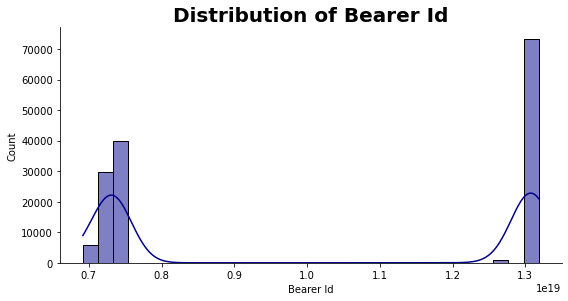

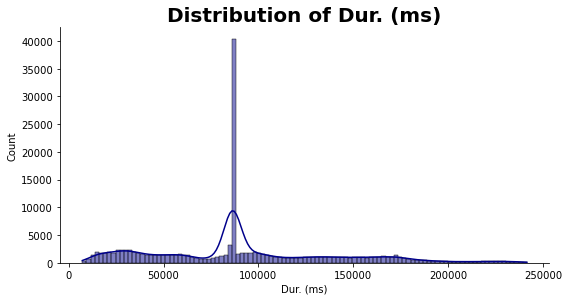

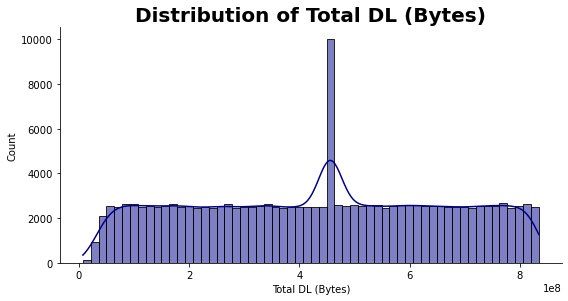

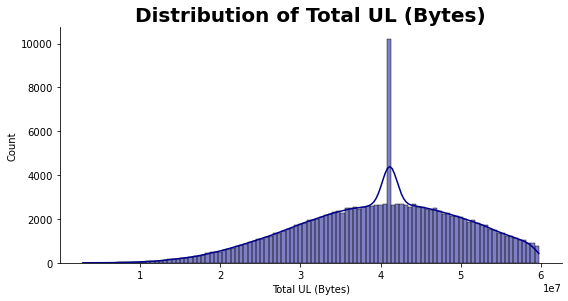

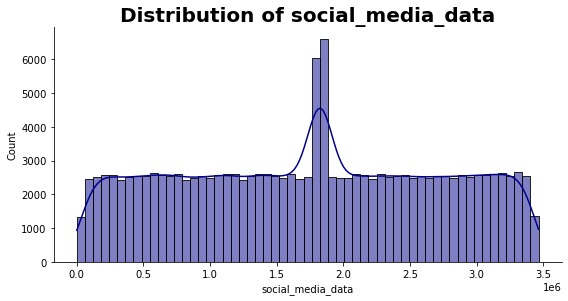

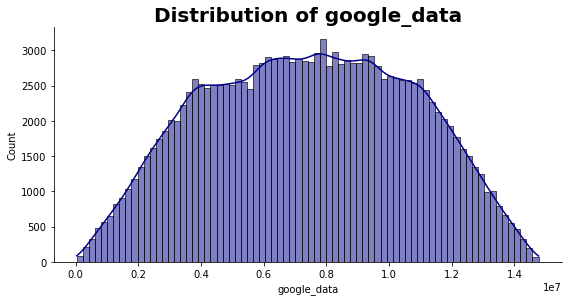

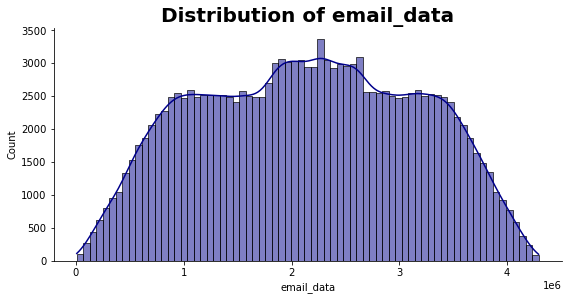

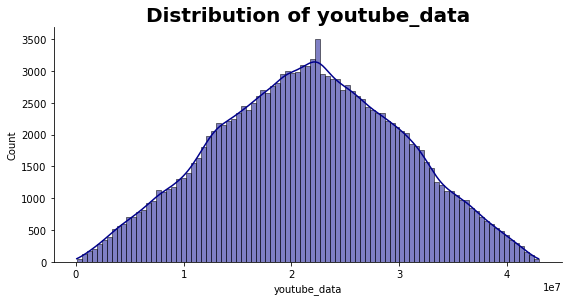

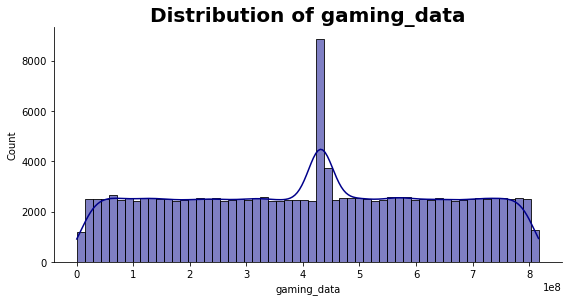

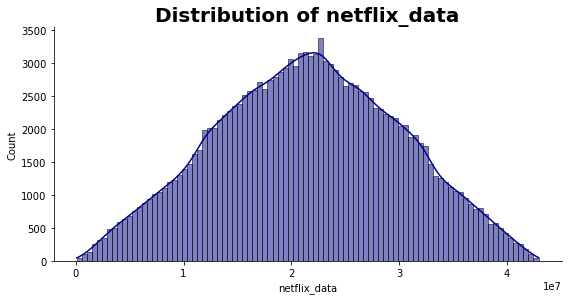

In [69]:
column_list = ["Bearer Id","Dur. (ms)","Total DL (Bytes)","Total UL (Bytes)","social_media_data",
               "google_data", "email_data","youtube_data","gaming_data", "netflix_data"]
for column in column_list:
    plot_hist(processed_data, column, "darkblue")
    plt.show()

### Bi-variate Distribution of Data 
- Social Media, Google, Email, YouTube, Netflix, Gaming, against UL and DL data

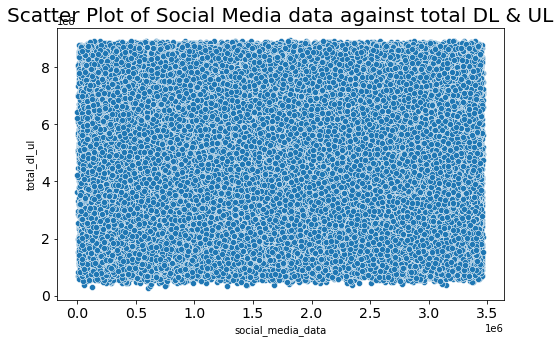

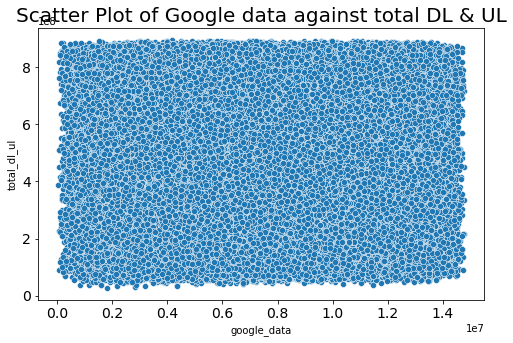

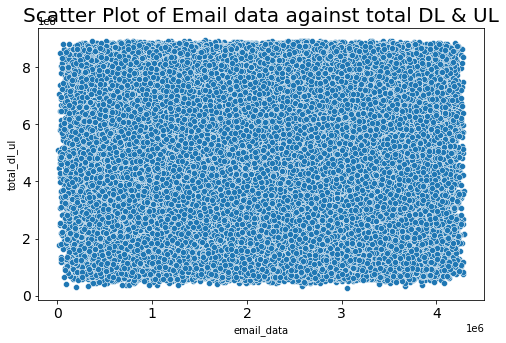

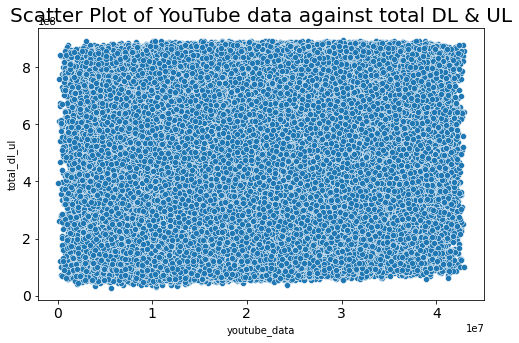

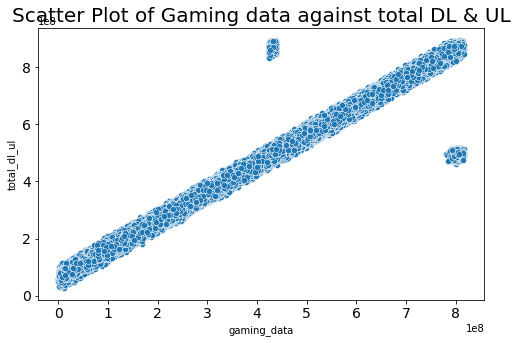

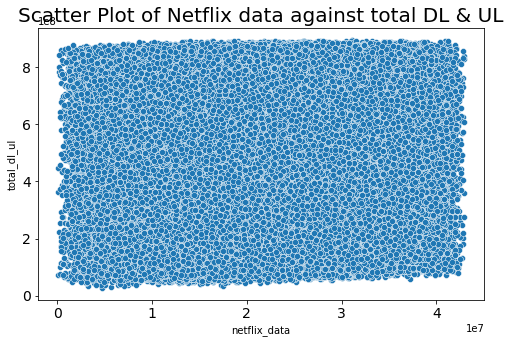

In [70]:
# Plotting Scatter Plots of Applications against UL & DL
#  X-axis Label
label = ["Social Media", "Google","Email", "YouTube", "Gaming", "Netflix"]


column_list = ["social_media_data","google_data", "email_data","youtube_data","gaming_data", "netflix_data"]
i = 0
for column in column_list:
    plot_scatter(processed_data, processed_data[column], processed_data["total_dl_ul"],"Scatter Plot of %s data against total DL & UL" % label[i], hue=None, style=None)
    i += 1
    plt.show()

#### There is a positive linear relationship between Total Ul/Dl and Gaming data usage.

### Segmenting the users into top five decile classes
 - Based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [71]:
processed_data['decile'] = pd.qcut(processed_data['Dur. (ms)'], 10, labels = False, duplicates='drop')
# processed_data['decile'].sample(5)

In [72]:
new_df = processed_data[['decile', 'total_dl_ul']]
decile_groups = new_df.groupby('decile').sum()
decile_groups

,total_dl_ul
decile,
0,7.108819e+12
1,7.109689e+12
2,7.164232e+12
3,1.900247e+13
4,3.059606e+12
5,6.337437e+12
6,7.091458e+12
7,7.142729e+12
8,7.173738e+12


Text(0.5, 0, 'deciles')

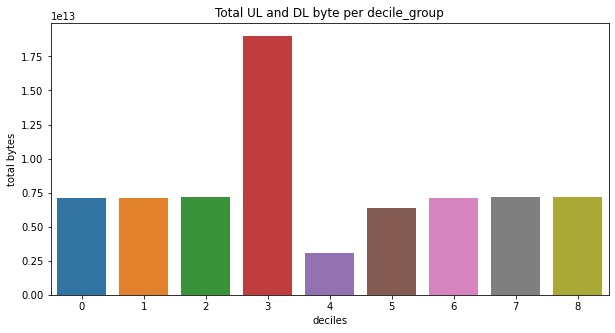

In [73]:
# Ploting the Decile Groups against data usage
plt.figure(figsize=(10,5))
sns.barplot(x = decile_groups.index, y = decile_groups.total_dl_ul)
plt.title('Total UL and DL byte per decile_group')
plt.ylabel('total bytes')
plt.xlabel('deciles')

### Correlation Analysis
 -To Compute a correlation matrix for Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

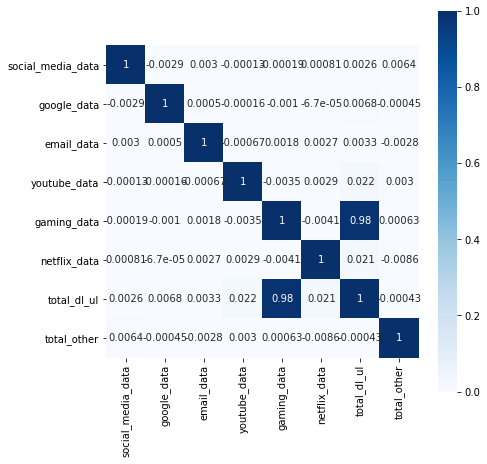

In [74]:
correlation_data = processed_data[["social_media_data","google_data", "email_data","youtube_data","gaming_data", "netflix_data", "total_dl_ul","total_other"]]

correlation = correlation_data.corr()
f_fig, f_ax = plt.subplots(figsize=(7, 7))
f_ax = sns.heatmap(correlation, vmin=0, vmax=1, square=True, annot=True, annot_kws={"size": 10}, cmap="Blues")

### Findings
- There is strong positive correlation between Gaming data and DL&UL data, hence they have a value 0.98 (which is between 0.7 and 1)

### Dimensionality Reduction
– To perform a principal component analysis to reduce the dimensions of the data and to provide a useful interpretation of the results.

## 2. User Engagement analysis
### Tracking the user’s engagement using the following engagement metrics:
- Sessions frequency
- The duration of the session
- The sessions total traffic (download and upload (bytes))

#### 2.1.1,2 & 3. Sessions frequency, The duration of the session, & The sessions total traffic

In [75]:
processed_data.columns
list_m = ['count']
aggre_user_data = processed_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',  'total_dl_ul': 'sum'})
aggre_user_data.columns = ['session_freq', 'session_duration(ms)', 'session_traffic']
aggre_user_data.head(5)

,session_freq,session_duration(ms),session_traffic
MSISDN/Number,,,
3.360100e+10,1,116720140.0,4.918942e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09


#### Top 10 users with high sessions frequency, longest sessions duration, and High data Traffic

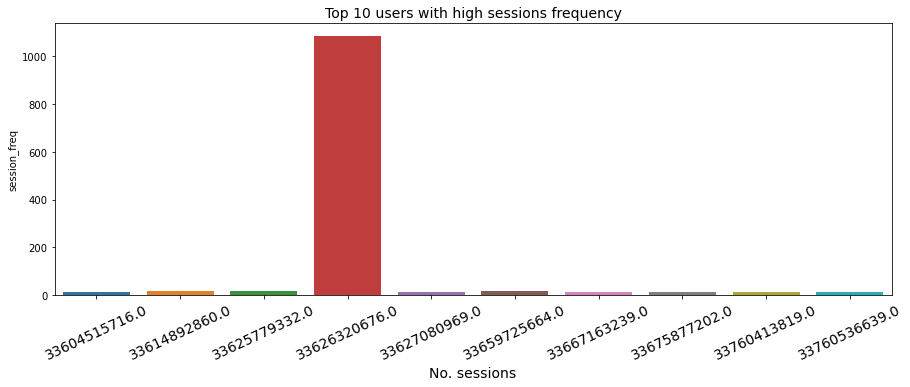

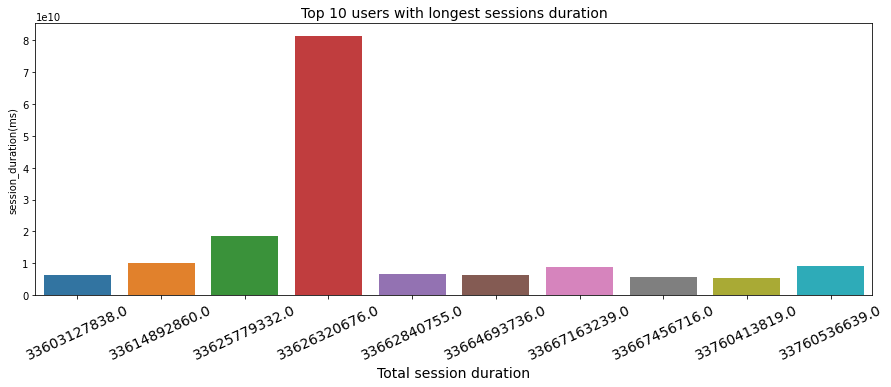

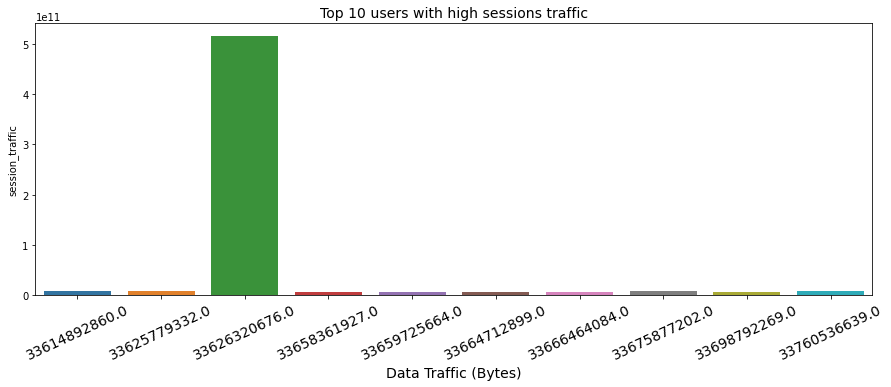

In [76]:
# Function to plot barplot

def bar_plot(data, column, title, y_label):
    plt.figure(figsize=(15,5))
    sns.barplot(x = data.index, y = data[column])
    plt.xlabel(y_label, fontsize=14)
    plt.xticks(rotation=25, fontsize=14)
    plt.title(title, fontsize=14)
    plt.show()

aggre_user_sess = aggre_user_data.sort_values(by='session_freq', ascending=False).head(10)
aggre_user_dur = aggre_user_data.sort_values(by='session_duration(ms)', ascending=False).head(10)
aggre_user_traffic = aggre_user_data.sort_values(by='session_traffic', ascending=False).head(10)

bar_plot(aggre_user_sess,'session_freq','Top 10 users with high sessions frequency','No. sessions')
bar_plot(aggre_user_dur,'session_duration(ms)','Top 10 users with longest sessions duration','Total session duration')
bar_plot(aggre_user_traffic,'session_traffic','Top 10 users with high sessions traffic','Data Traffic (Bytes)')

#### To Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [77]:
# Normalizing the aggregated dataset using log transformation
#Standardize and Normalize the data
P = PowerTransformer()
scaled_data = P.fit_transform(aggre_user_data)
kmeans_1 = KMeans(3, random_state=10)
kmeans_1.fit(scaled_data)
aggre_user_data['cluster'] = kmeans_1.labels_

aggre_user_data.info


<bound method DataFrame.info of                session_freq  session_duration(ms)  session_traffic  cluster
MSISDN/Number                                                              
3.360100e+10              1           116720140.0     4.918942e+08        0
3.360100e+10              1           181230963.0     1.568596e+08        0
3.360100e+10              1           134969374.0     5.959665e+08        0
3.360101e+10              1            49878024.0     4.223207e+08        0
3.360101e+10              2            37104453.0     1.457411e+09        1
...                     ...                   ...              ...      ...
3.379000e+10              1             8810688.0     7.146416e+08        0
3.379000e+10              1           140988659.0     4.803073e+08        0
3.197021e+12              1           877385325.0     2.321240e+08        0
3.370000e+14              1           253030201.0     5.962878e+08        0
8.823971e+14              1           869844200.0     1.

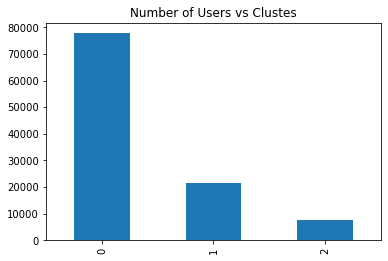

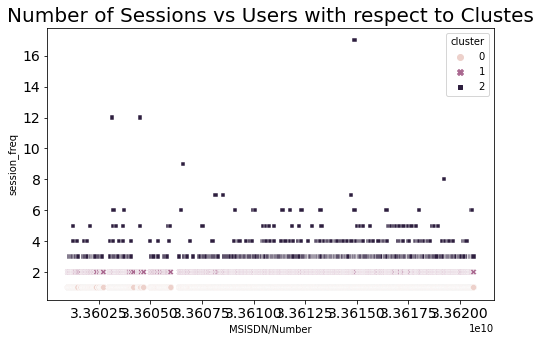

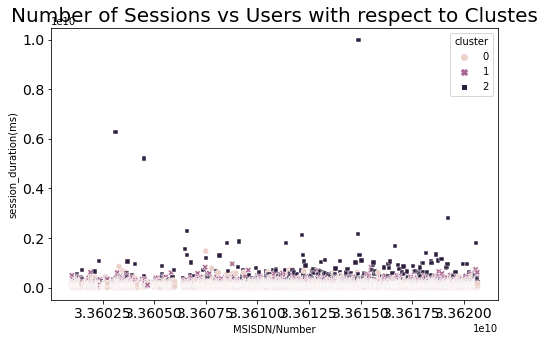

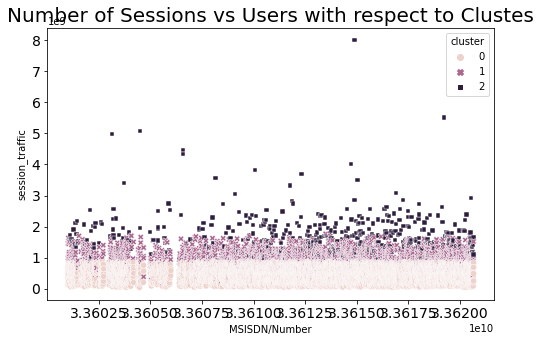

In [78]:
aggre_user_data['cluster'].value_counts().plot(kind='bar', title = 'Number of Users vs Clustes')
plot_scatter(aggre_user_data.head(10000), x_col="MSISDN/Number", y_col="session_freq", hue="cluster", style="cluster",
            title="Number of Sessions vs Users with respect to Clustes")

plot_scatter(aggre_user_data.head(10000), x_col="MSISDN/Number", y_col="session_duration(ms)", hue="cluster", style="cluster",
            title="Number of Sessions vs Users with respect to Clustes")

plot_scatter(aggre_user_data.head(10000), x_col="MSISDN/Number", y_col="session_traffic", hue="cluster", style="cluster",
            title="Number of Sessions vs Users with respect to Clustes")

In [79]:
aggre_user_data['cluster'].value_counts().describe

<bound method NDFrame.describe of 0    77730
1    21452
2     7673
Name: cluster, dtype: int64>

#### Most Engaged users per Application

In [80]:
user_aggregation = processed_data.groupby('MSISDN/Number')["social_media_data","google_data", "email_data","youtube_data","gaming_data", "netflix_data"].sum()
user_aggregation.head(10)

column_list1 = ["social_media_data","google_data", "email_data","youtube_data","gaming_data", "netflix_data"]
for column in column_list1:
    print("Most Engaged Users for %s" %column)
    print(user_aggregation[column].sort_values(ascending=False).head(10))

Most Engaged Users for social_media_data
MSISDN/Number
3.362632e+10    1.914618e+09
3.376054e+10    3.808604e+07
3.365973e+10    3.211439e+07
3.361489e+10    2.826422e+07
3.366716e+10    2.421780e+07
3.366907e+10    2.380083e+07
3.362578e+10    2.362875e+07
3.366553e+10    2.258603e+07
3.360313e+10    2.139362e+07
3.365936e+10    2.132165e+07
Name: social_media_data, dtype: float64
Most Engaged Users for google_data
MSISDN/Number
3.362632e+10    8.029171e+09
3.362578e+10    1.382863e+08
3.361489e+10    1.261167e+08
3.376054e+10    1.173772e+08
3.365973e+10    1.165163e+08
3.367588e+10    1.098605e+08
3.378632e+10    1.025432e+08
3.366716e+10    9.562771e+07
3.366508e+10    8.763451e+07
3.360658e+10    8.549232e+07
Name: google_data, dtype: float64
Most Engaged Users for email_data
MSISDN/Number
3.362632e+10    2.319939e+09
3.362578e+10    4.020517e+07
3.361489e+10    3.902241e+07
3.365973e+10    3.425682e+07
3.376054e+10    3.200048e+07
3.378632e+10    3.081158e+07
3.367588e+10    3.06

#### Most used Applications

<AxesSubplot:title={'center':'Most used Apps'}>

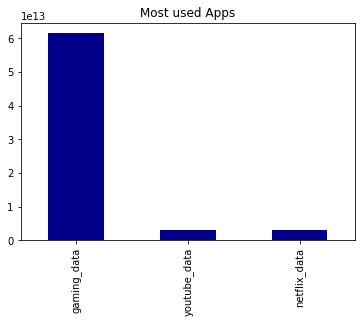

In [81]:
user_aggregation[user_aggregation.columns[1:]].sum().sort_values(ascending=False).head(3).plot(kind = "bar", color ="darkblue" ,title= "Most used Apps")

### 3. User Experience Analytics¶

#### Aggregating, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput

In [83]:
 # Filling Missing Values for 'TCP DL Retrans. Vol (Bytes)', and 'TCP UL Retrans. Vol (Bytes)'

# def Mean_filling(data, column_list):
#     for column in column_list:
#         data[column] = data[column].fillna(data[column].mean())
#
#     return data
#
# column_list = ['TCP_DL_UL']
#
# processed_data = Mean_filling(processed_data, column_list)
# processed_data.info()

In [106]:
user_aggregate = processed_data.groupby('MSISDN/Number').agg({'RTT_DL_UL':'mean','TCP_DL_UL':'mean','TP_DL_UL':'mean','Handset Type':'count'})
print("Average TCP retransmission, Average RTT,Handset type, Average throughput")
user_aggregate.sample(2)

Average TCP retransmission, Average RTT,Handset type, Average throughput


,RTT_DL_UL,TCP_DL_UL,TP_DL_UL,Handset Type
MSISDN/Number,,,,
3.376077e+10,44.0,2.571697e+07,65.0,2
3.376363e+10,68.0,3.538115e+06,60313.0,1


In [107]:
user_aggregate = processed_data.groupby('MSISDN/Number')['RTT_DL_UL','TCP_DL_UL','TP_DL_UL','Handset Type'].mean()
# user_aggregate.head(10)

column_list1 = ['RTT_DL_UL','TCP_DL_UL','TP_DL_UL']
for column in column_list1:
    print("Average %s per Users " %column)
    print(user_aggregate[column].sort_values(ascending=False).head(10))

Average RTT_DL_UL per Users 
MSISDN/Number
3.366232e+10    96924.0
3.368369e+10    54848.0
3.366087e+10    32335.0
3.376094e+10    27278.0
3.360679e+10    26300.0
3.367182e+10    25715.0
3.378187e+10    25388.0
3.378401e+10    24738.0
3.369855e+10    23010.5
3.362963e+10    20980.0
Name: RTT_DL_UL, dtype: float64
Average TCP_DL_UL per Users 
MSISDN/Number
3.369858e+10    4.301477e+09
3.365871e+10    4.288121e+09
3.366491e+10    4.268647e+09
3.365863e+10    4.254660e+09
3.366613e+10    4.211258e+09
3.366877e+10    4.166595e+09
3.366131e+10    4.137938e+09
3.366240e+10    4.117805e+09
3.366682e+10    3.968121e+09
3.376264e+10    3.786871e+09
Name: TCP_DL_UL, dtype: float64
Average TP_DL_UL per Users 
MSISDN/Number
3.365991e+10    283931.0
3.366268e+10    265724.0
3.366566e+10    265176.5
3.366349e+10    254950.0
3.362795e+10    238982.0
3.362118e+10    235365.0
3.378240e+10    230982.0
3.365148e+10    228303.0
3.376033e+10    227334.0
3.376267e+10    226505.0
Name: TP_DL_UL, dtype: float

### Computing & listing 10 of the top, bottom and most frequent:
- TCP values in the dataset.
- RTT values in the dataset.
- Throughput values in the dataset.

In [86]:
column_list1 = ['RTT_DL_UL','TCP_DL_UL','TP_DL_UL']
for column in column_list1:
    print(column, "Top 10")
    print(user_aggregate[column].value_counts().head(10))
    print(column, "Bottom 10")
    print(user_aggregate[column].value_counts().tail(10))
    print(column, "MOde")
    print(user_aggregate[column].mode()[0])

RTT_DL_UL Top 10
127.458589    18514
29.000000      2950
39.000000      2367
38.000000      1639
40.000000      1583
30.000000      1577
28.000000      1456
49.000000      1308
41.000000      1207
31.000000      1190
Name: RTT_DL_UL, dtype: int64
RTT_DL_UL Bottom 10
6954.000000    1
24.714286      1
55.409765      1
276.229294     1
282.400000     1
1624.000000    1
209.750000     1
2309.000000    1
3478.500000    1
555.500000     1
Name: RTT_DL_UL, dtype: int64
RTT_DL_UL MOde
127.45858896466059
TCP_DL_UL Top 10
2.571697e+07    67549
5.320000e+03       16
2.571697e+07       14
6.650000e+03       12
2.660000e+03       12
3.990000e+03       11
7.980000e+03        9
9.310000e+03        6
1.286181e+07        6
2.648000e+03        6
Name: TCP_DL_UL, dtype: int64
TCP_DL_UL Bottom 10
1.432569e+07    1
6.873970e+05    1
6.456761e+06    1
2.519252e+06    1
1.287445e+07    1
5.573433e+06    1
1.763589e+06    1
3.410750e+06    1
5.578000e+03    1
7.668832e+07    1
Name: TCP_DL_UL, dtype: int64
TC

### Compute & report:
 - The distribution of the average throughput  per handset type and provide interpretation for your findings.
 - The average TCP retransmission view per handset type and provide interpretation for your findings.

In [87]:
# print(processed_data.columns)
column_list1 = ['TCP_DL_UL','TP_DL_UL','RTT_DL_UL']
for column in column_list1:
    print("Handset Distributuion per %s" % column)
    print(processed_data.groupby('Handset Type')[column].mean().reset_index().sort_values(by = column,ascending = False)[:8])

Handset Distributuion per TCP_DL_UL
                                   Handset Type     TCP_DL_UL
324                             Huawei Bln-Al10  3.291746e+08
142         Asustek Asus Zenfone Selfie Zd551Kl  3.216583e+08
974             Samsung Galaxy Tab S3 (Sm-T825)  2.077707e+08
345                            Huawei E5776S-32  1.722301e+08
29                       Apple iPad Pro (A1652)  1.383527e+08
901                      Samsung Galaxy J8 2018  1.157583e+08
212   Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9  1.065822e+08
1338                     Xiaomi Communica. Mi 6  7.538708e+07
Handset Distributuion per TP_DL_UL
                     Handset Type       TP_DL_UL
321              Huawei B715S-23C  108994.230769
706       New-Bund Technol. Mix 2  105211.000000
575                        Lg G6+  100135.000000
1393    Zyxel Communicat. Sbg3600   97351.000000
468                Huawei Y9 2019   91739.000000
1336   Xiaomi Communica. M1902F1G   85613.666667
1156  Spa Condor Elect. Allu

#### User Clustering based on their Experiences
- Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)
##### For this case i will be using, Handset Type to represent User

In [88]:
aggre_user_experience = processed_data.groupby('Handset Type').agg({'Bearer Id':'count', 'TCP_DL_UL':'mean', 'TP_DL_UL': 'mean'})
aggre_user_experience.columns = ['session_freq_handset', 'avg_tcp_volume(bytes)', 'avg_throughput_volume(bytes)']
aggre_user_experience.sample(3)

,session_freq_handset,avg_tcp_volume(bytes),avg_throughput_volume(bytes)
Handset Type,,,
Lg-K350Nds,7,1.674048e+07,9102.000000
Htc Desire 825,12,6.856525e+06,18214.916667
Lenovo Moto G (5Th Gen) Da12984545,8,1.758981e+07,15534.125000


### Analysis on Experience vs Handset

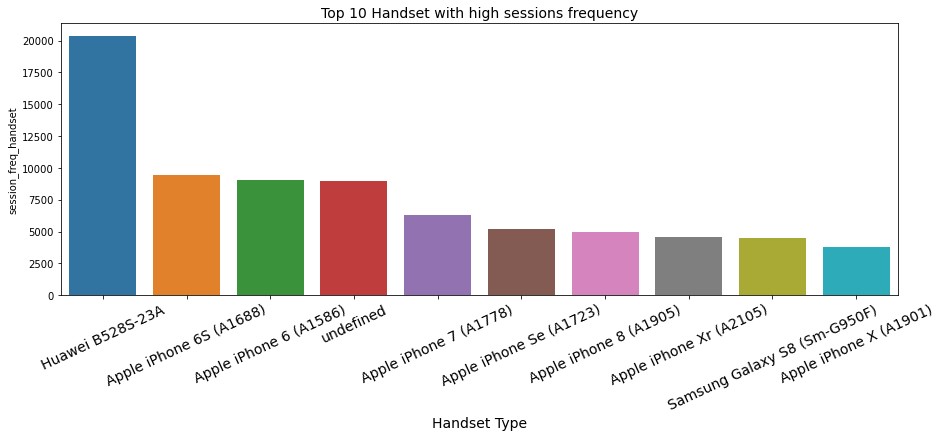

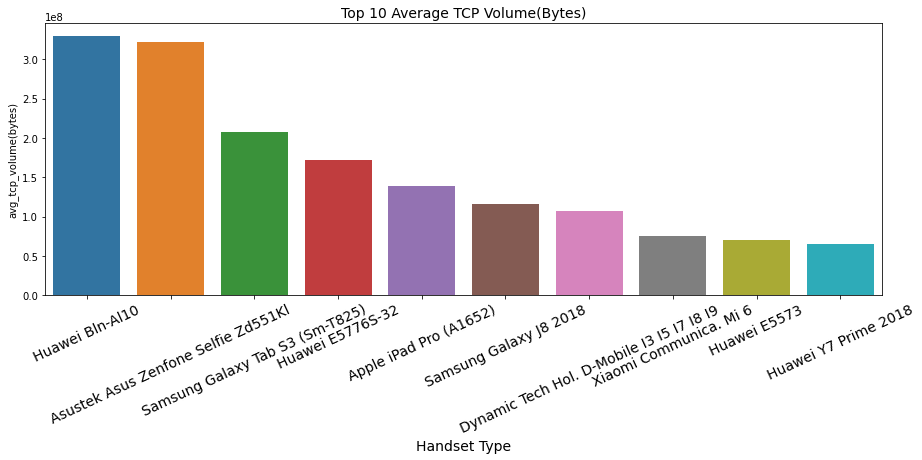

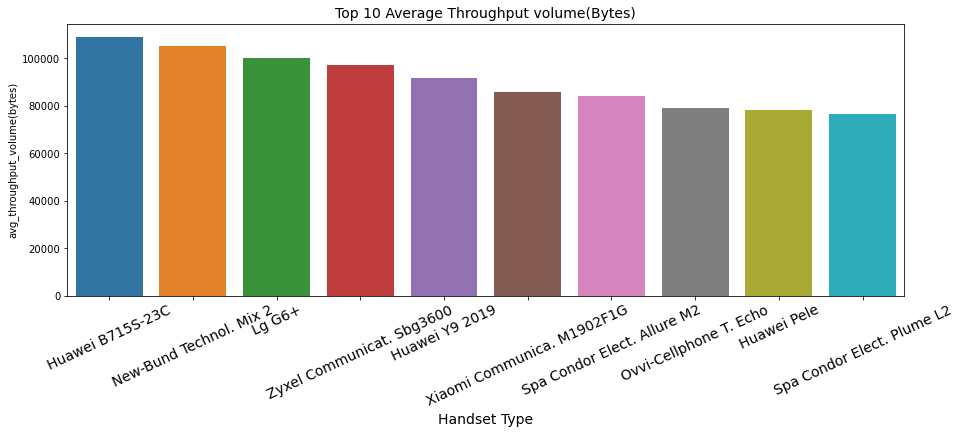

In [89]:
# Function to plot barplot

user_exp_handset_freq = aggre_user_experience.sort_values(by='session_freq_handset', ascending=False).head(10)
user_exp_tcp_avg = aggre_user_experience.sort_values(by='avg_tcp_volume(bytes)', ascending=False).head(10)
user_exp_throughput_avg = aggre_user_experience.sort_values(by='avg_throughput_volume(bytes)', ascending=False).head(10)

bar_plot(user_exp_handset_freq,'session_freq_handset','Top 10 Handset with high sessions frequency','Handset Type')
bar_plot(user_exp_tcp_avg,'avg_tcp_volume(bytes)','Top 10 Average TCP Volume(Bytes)','Handset Type')
bar_plot(user_exp_throughput_avg,'avg_throughput_volume(bytes)','Top 10 Average Throughput volume(Bytes)','Handset Type')

### Clustering

In [90]:
#Standardize and Normalize the data
P = PowerTransformer()
scaled_data = P.fit_transform(aggre_user_experience)
kmeans_2 = KMeans(3, random_state=10)
kmeans_2.fit(scaled_data)
aggre_user_experience['cluster'] = kmeans_2.labels_

# aggre_user_experience.info


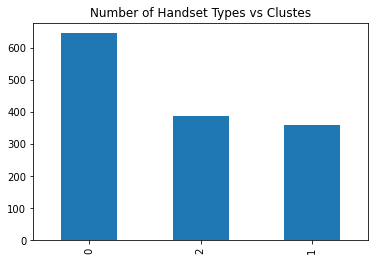

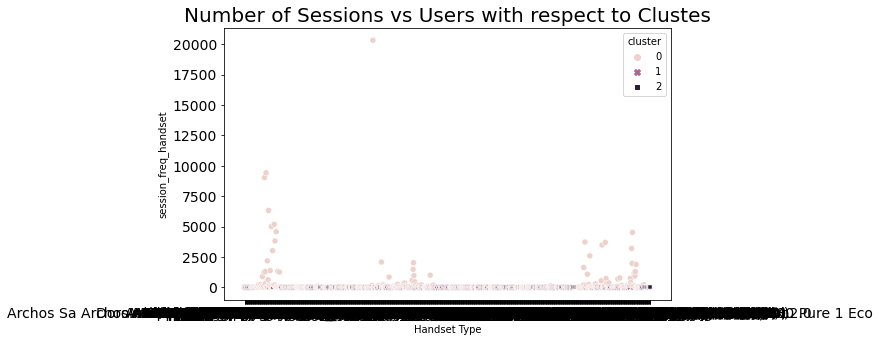

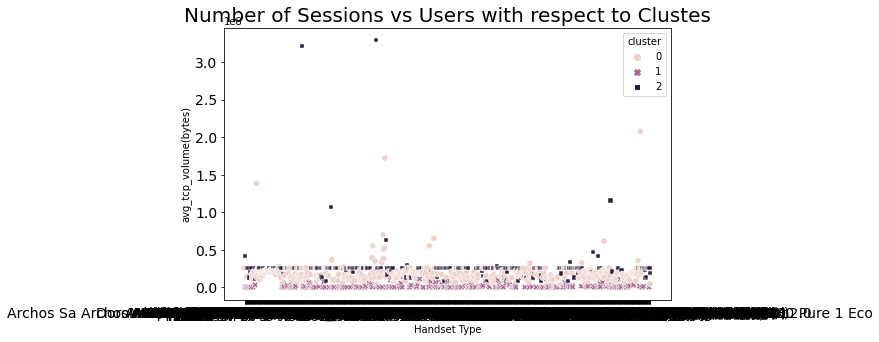

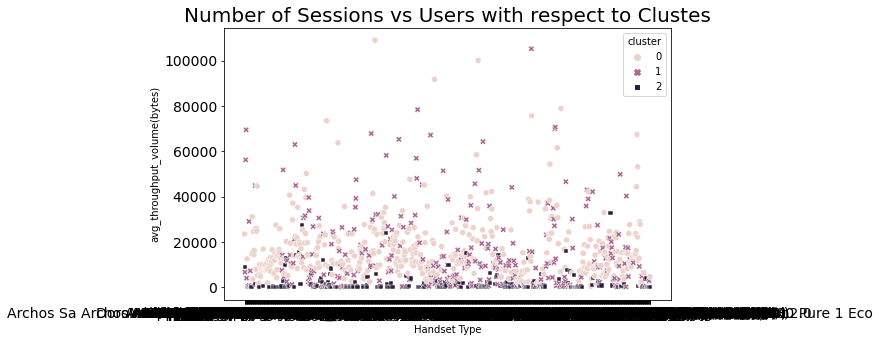

Cluster per Session frequency
         session_freq_handset
cluster                      
0                         646
1                         361
2                         389
Cluster per Average TCP Volume (Bytes)
         avg_tcp_volume(bytes)
cluster                       
0                 1.802744e+07
1                 1.510650e+06
2                 2.613311e+07
Cluster per Average Throughput Volume (Bytes)
         avg_throughput_volume(bytes)
cluster                              
0                        16322.053163
1                        16813.808383
2                         1789.766749


In [91]:
aggre_user_experience['cluster'].value_counts().plot(kind='bar', title = 'Number of Handset Types vs Clustes')
plot_scatter(aggre_user_experience.head(1000), x_col="Handset Type", y_col="session_freq_handset", hue="cluster", style="cluster",
            title="Number of Sessions vs Users with respect to Clustes")

plot_scatter(aggre_user_experience.head(1000), x_col="Handset Type", y_col="avg_tcp_volume(bytes)", hue="cluster", style="cluster",
            title="Number of Sessions vs Users with respect to Clustes")

plot_scatter(aggre_user_experience.head(1000), x_col="Handset Type", y_col="avg_throughput_volume(bytes)", hue="cluster", style="cluster",
            title="Number of Sessions vs Users with respect to Clustes")
print("Cluster per Session frequency")
print(aggre_user_experience.groupby('cluster').agg({'session_freq_handset':'count'}))
print("Cluster per Average TCP Volume (Bytes)")
print(aggre_user_experience.groupby('cluster').agg({'avg_tcp_volume(bytes)':'mean'}))
print("Cluster per Average Throughput Volume (Bytes)")
print(aggre_user_experience.groupby('cluster').agg({'avg_throughput_volume(bytes)':'mean'}))

### 4. User Satisfaction Analysis

#### Based on the engagement analysis + the experience analysis you conducted above
 - Engagement score to each user,
 - Experience score to each user

In [92]:
# Importing Necessary Packages
from scipy.spatial import distance

In [94]:
# Engagement score to each user, Using User Engagement Clustering Analysis
aggre_user_data.head(4)

,session_freq,session_duration(ms),session_traffic,cluster
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,491894185.5,0
3.360100e+10,1,181230963.0,156859643.0,0
3.360100e+10,1,134969374.0,595966483.0,0
3.360101e+10,1,49878024.0,422320698.0,0


In [95]:
kmeans_1.cluster_centers_

array([[-0.61142149,  0.        ,  0.        ],
       [ 1.57725067,  0.        ,  0.        ],
       [ 1.78425796,  0.        ,  0.        ]])

In [96]:
engagement_score = []
centroids_1 = kmeans_1.cluster_centers_[:,2]
# print(len(aggre_user_data.index), aggre_user_data.iloc[1][1])
for i in range(len(aggre_user_data.index)):
    idx = aggre_user_data.iloc[i][1]
    engagement_score.append(distance.euclidean(idx, centroids_1))

In [97]:
engagement_score[:4]

[202165212.7465524, 313901235.8206353, 233773813.23376584, 86391271.74913985]

#### Engagement score to each user, Using User Experience Analysis

In [98]:
# Engagement score to each user, Using User Experience Clustering Analysis
aggre_user_experience.head(4)

,session_freq_handset,avg_tcp_volume(bytes),avg_throughput_volume(bytes),cluster
Handset Type,,,,
A-Link Telecom I. Cubot A5,1,2.571697e+07,23510.0,0
A-Link Telecom I. Cubot Note Plus,1,6.162130e+05,6699.0,1
A-Link Telecom I. Cubot Note S,1,4.141173e+07,8937.0,2
A-Link Telecom I. Cubot Nova,1,1.371700e+05,56217.0,1


In [99]:
kmeans_2.cluster_centers_
experience_score = []
centroids_1 = kmeans_2.cluster_centers_[:,2]
# print(len(aggre_user_data.index), aggre_user_data.iloc[1][1])
for i in range(len(aggre_user_experience.index)):
    idx = aggre_user_experience.iloc[i][1]
    experience_score.append(distance.euclidean(idx, centroids_1))

In [100]:
experience_score[:4]

[44543092.48626841, 1067312.3993855705, 71727222.2964755, 237585.58437795567]

#### Considering the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer

In [101]:
train_df = pd.DataFrame(columns = ['experience_score', 'engagement_score'])

In [115]:
# train_df['engagement_score'] = engagement_score
# train_df['experience_score'] = experience_score
# train_df['MSISDN/Number'] = aggre_user_experience['MSISDN/Number'].sample(1396)
processed_data.info() #.to_list()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149998
Data columns (total 59 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149999 non-null  float64
 1   Start                           149999 non-null  object 
 2   Start ms                        149999 non-null  float64
 3   End                             149999 non-null  object 
 4   End ms                          149999 non-null  float64
 5   Dur. (ms)                       149999 non-null  float64
 6   IMSI                            149999 non-null  float64
 7   MSISDN/Number                   149999 non-null  float64
 8   IMEI                            149999 non-null  float64
 9   Last Location Name              149999 non-null  object 
 10  Avg RTT DL (ms)                 149999 non-null  float64
 11  Avg RTT UL (ms)                 149999 non-null  float64
 12  Avg Bearer TP DL